In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train = pd.read_csv("/content/sample_data/train_jqd04QH.csv").drop('enrollee_id', axis=1)
test=pd.read_csv("/content/sample_data/test_KaymcHn.csv").drop('enrollee_id', axis=1)

In [18]:
train.head(20)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
5,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
7,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,<10,Pvt Ltd,>4,8,0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,10,0
9,city_97,0.925,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,85,0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18359 non-null  object 
 1   city_development_index  18359 non-null  float64
 2   gender                  14261 non-null  object 
 3   relevent_experience     18359 non-null  object 
 4   enrolled_university     18017 non-null  object 
 5   education_level         17902 non-null  object 
 6   major_discipline        15521 non-null  object 
 7   experience              18300 non-null  object 
 8   company_size            13580 non-null  object 
 9   company_type            13320 non-null  object 
 10  last_new_job            17992 non-null  object 
 11  training_hours          18359 non-null  int64  
 12  target                  18359 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.8+ MB


In [33]:
train['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [21]:
train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [22]:
train['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

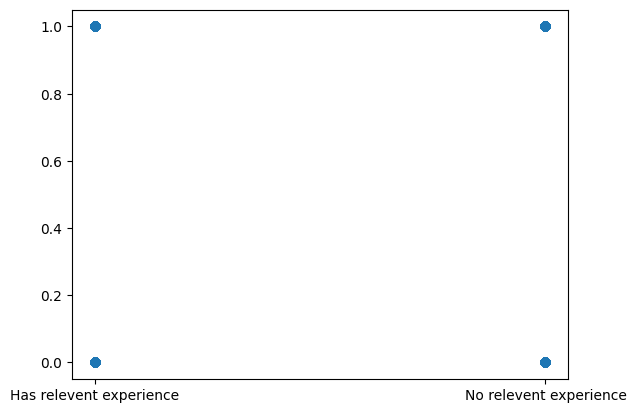

In [23]:
plt.scatter(train['relevent_experience'], train['target'])
plt.show()

In [24]:
train['experience']=train['experience'].replace('>20','21').replace('<1','0.5')

In [31]:
train['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

<Axes: >

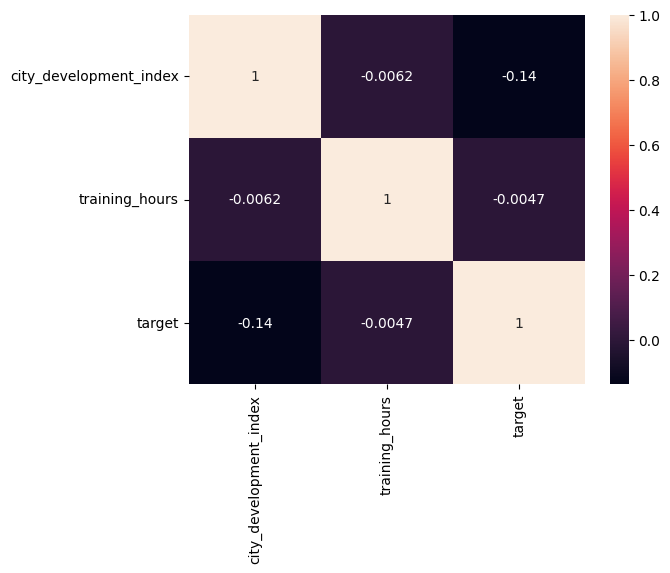

In [26]:
sns.heatmap(train.select_dtypes(include=['number']).corr(),annot=True)

In [32]:
train['experience'].astype(float)
train['last_new_job'].replace('>4','5').replace('never','0').astype(float)

,last_new_job
0,1.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
18354,1.0
18355,1.0
18356,3.0
18357,3.0
